# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [532]:
import pandas as pd
import numpy as np
import numpy.random
iris = pd.read_csv('iris-1.csv')
random_iris = iris.sample(10)
random_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
125,126,7.2,3.2,6.0,1.8,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [533]:
#fillna column wise

print(iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Fill missing values with median of that particular column

In [534]:
#calculate median for each column & fillna column wise
iris.fillna(iris.median(),inplace=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [535]:
#change the dtype of species/classes to category & then update with codes
iris['Species'] = iris['Species'].astype('category')
print(iris.dtypes)
iris.head()
iris['Species'] = iris['Species'].cat.codes
iris

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [536]:
#droping id column, since it has no more effect
iris=iris.drop('Id',axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [537]:
print('Droping columns whose corr is in range -0.1 to 0.1')
columns_to_remove = iris.apply(lambda x : x.corr(iris['Species'])).between(-0.1,0.1,inclusive=True)
iris.drop(iris.columns[columns_to_remove],axis=1)

Droping columns whose corr is in range -0.1 to 0.1


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [538]:
print("Variance : After dropping variables < 0.1 variance  \n")
print("=====================================================")
iris_drop = iris.drop(columns='Species')
columns_to_remove = iris_drop.var() < 0.1
iris_drop.drop(iris_drop.columns[columns_to_remove],axis=1)


Variance : After dropping variables < 0.1 variance  



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

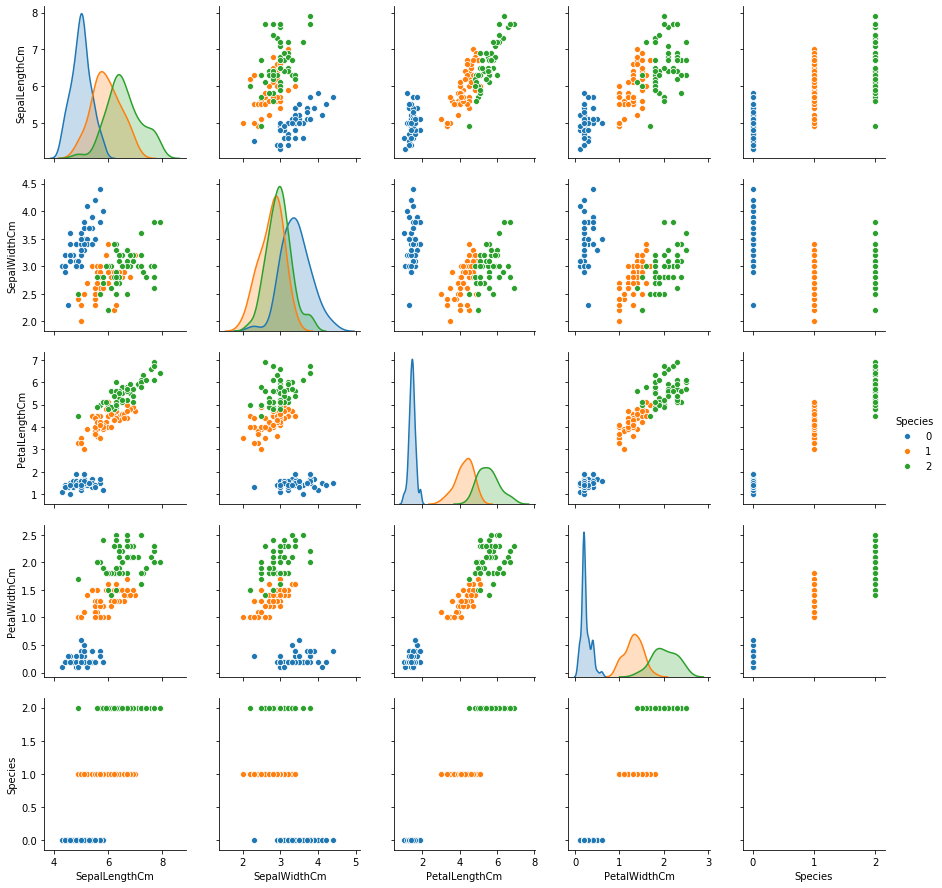

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(iris, hue='Species', diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C9822C6C8>,
      dtype=object)

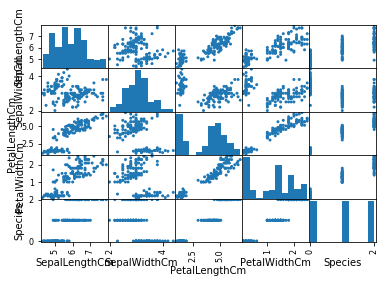

In [505]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [506]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 80:20 ratio
X= iris.drop('Species',axis=1)
y= iris.Species
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("Training Independent variables",X_train)
print("Training Target variables",y_train)
print("Test Independent variables",X_test)
print("Test Target variables",y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8
Training Independent variables      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [507]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [3,5,9]
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'uniform', p=2)
    KNN.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k= %d  is %f "%( k,accuracy_score_test))

test accuracy for k= 3  is 1.000000 
test accuracy for k= 5  is 1.000000 
test accuracy for k= 9  is 1.000000 


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [508]:
neighbors = list(range(1, 20, 2))
cv_list=[]
cv_df = pd.DataFrame()
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'uniform', p=2)
    KNN.fit(X_train, y_train)
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k="+ str(k)+" is ",accuracy_score_test)
    cv_list.append(accuracy_score_test)

data = pd.DataFrame({"K": neighbors,"Accuracy": cv_list})
print('****************************')  
print('List of Optimal Neighbours')   
print('****************************')  
print(data[data["Accuracy"] == data["Accuracy"].max()])

test accuracy for k=1 is  1.0
test accuracy for k=3 is  1.0
test accuracy for k=5 is  1.0
test accuracy for k=7 is  1.0
test accuracy for k=9 is  1.0
test accuracy for k=11 is  1.0
test accuracy for k=13 is  1.0
test accuracy for k=15 is  0.9666666666666667
test accuracy for k=17 is  0.9666666666666667
test accuracy for k=19 is  1.0
****************************
List of Optimal Neighbours
****************************
    K  Accuracy
0   1       1.0
1   3       1.0
2   5       1.0
3   7       1.0
4   9       1.0
5  11       1.0
6  13       1.0
9  19       1.0


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

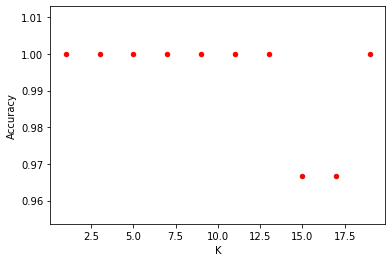

In [509]:
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='K',y='Accuracy',color='red')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [510]:
bc = pd.read_csv('bc2.csv')


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [511]:
bc.shape

(699, 11)

In [512]:
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [513]:
print(bc.describe(include='all'))

                  ID  ClumpThickness   Cell Size  Cell Shape  \
count   6.990000e+02      699.000000  699.000000  699.000000   
unique           NaN             NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN   
mean    1.071704e+06        4.417740    3.134478    3.207439   
std     6.170957e+05        2.815741    3.051459    2.971913   
min     6.163400e+04        1.000000    1.000000    1.000000   
25%     8.706885e+05        2.000000    1.000000    1.000000   
50%     1.171710e+06        4.000000    1.000000    1.000000   
75%     1.238298e+06        6.000000    5.000000    5.000000   
max     1.345435e+07       10.000000   10.000000   10.000000   

        Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
count          699.000000                   699.000000         699   
unique                NaN                          NaN          11   
top                  

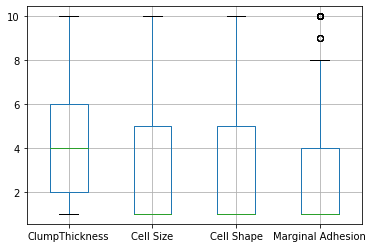

In [514]:
bc.boxplot(column=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion'])

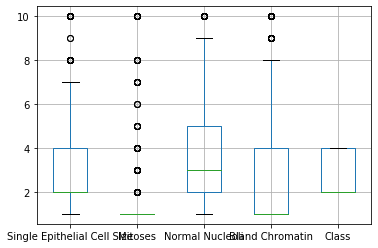

In [515]:
bc.boxplot(column=['Single Epithelial Cell Size','Mitoses','Normal Nucleoli','Bland Chromatin','Class'])

#### Check Missing Values

In [516]:
print("Missing Values \n",bc.isnull().sum())

Missing Values 
 ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [517]:
no_of_rows = bc[bc['Bare Nuclei']=='?'].shape[0]
print('No. of rows with ? in Bare Nuclei feature" ',no_of_rows)

No. of rows with ? in Bare Nuclei feature"  16


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [518]:
mostVal = (bc['Bare Nuclei'].value_counts().idxmax())
print('Most value present in Bare Nuclei feature is : ',mostVal)
#bc["Bare Nuclei"].replace({"?": mostVal}, inplace=True)
bc['Bare Nuclei'] = bc['Bare Nuclei'].replace('?',mostVal)
print(bc['Bare Nuclei'].value_counts())
bc

Most value present in Bare Nuclei feature is :  1
1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Question 5
#### Find the distribution of target variable (Class) 

In [519]:
bc['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

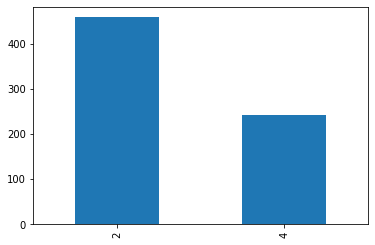

In [520]:
bc['Class'].value_counts().plot(kind='bar')

#### Convert the datatype of Bare Nuclei to `int`

In [521]:
print('*********Before********')
print(bc.dtypes)
bc['Bare Nuclei'] = bc['Bare Nuclei'].astype('int')
print('*********After********')
print(bc.dtypes)

*********Before********
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object
*********After********
ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object


In [522]:
#droping id column, since it has no more effect
bc=bc.drop('ID',axis=1)


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2,1,1,1,2
695,2,1,1,2,1,1,1,1,2
696,5,10,3,7,3,8,10,2,4
697,4,8,4,3,4,10,6,1,4


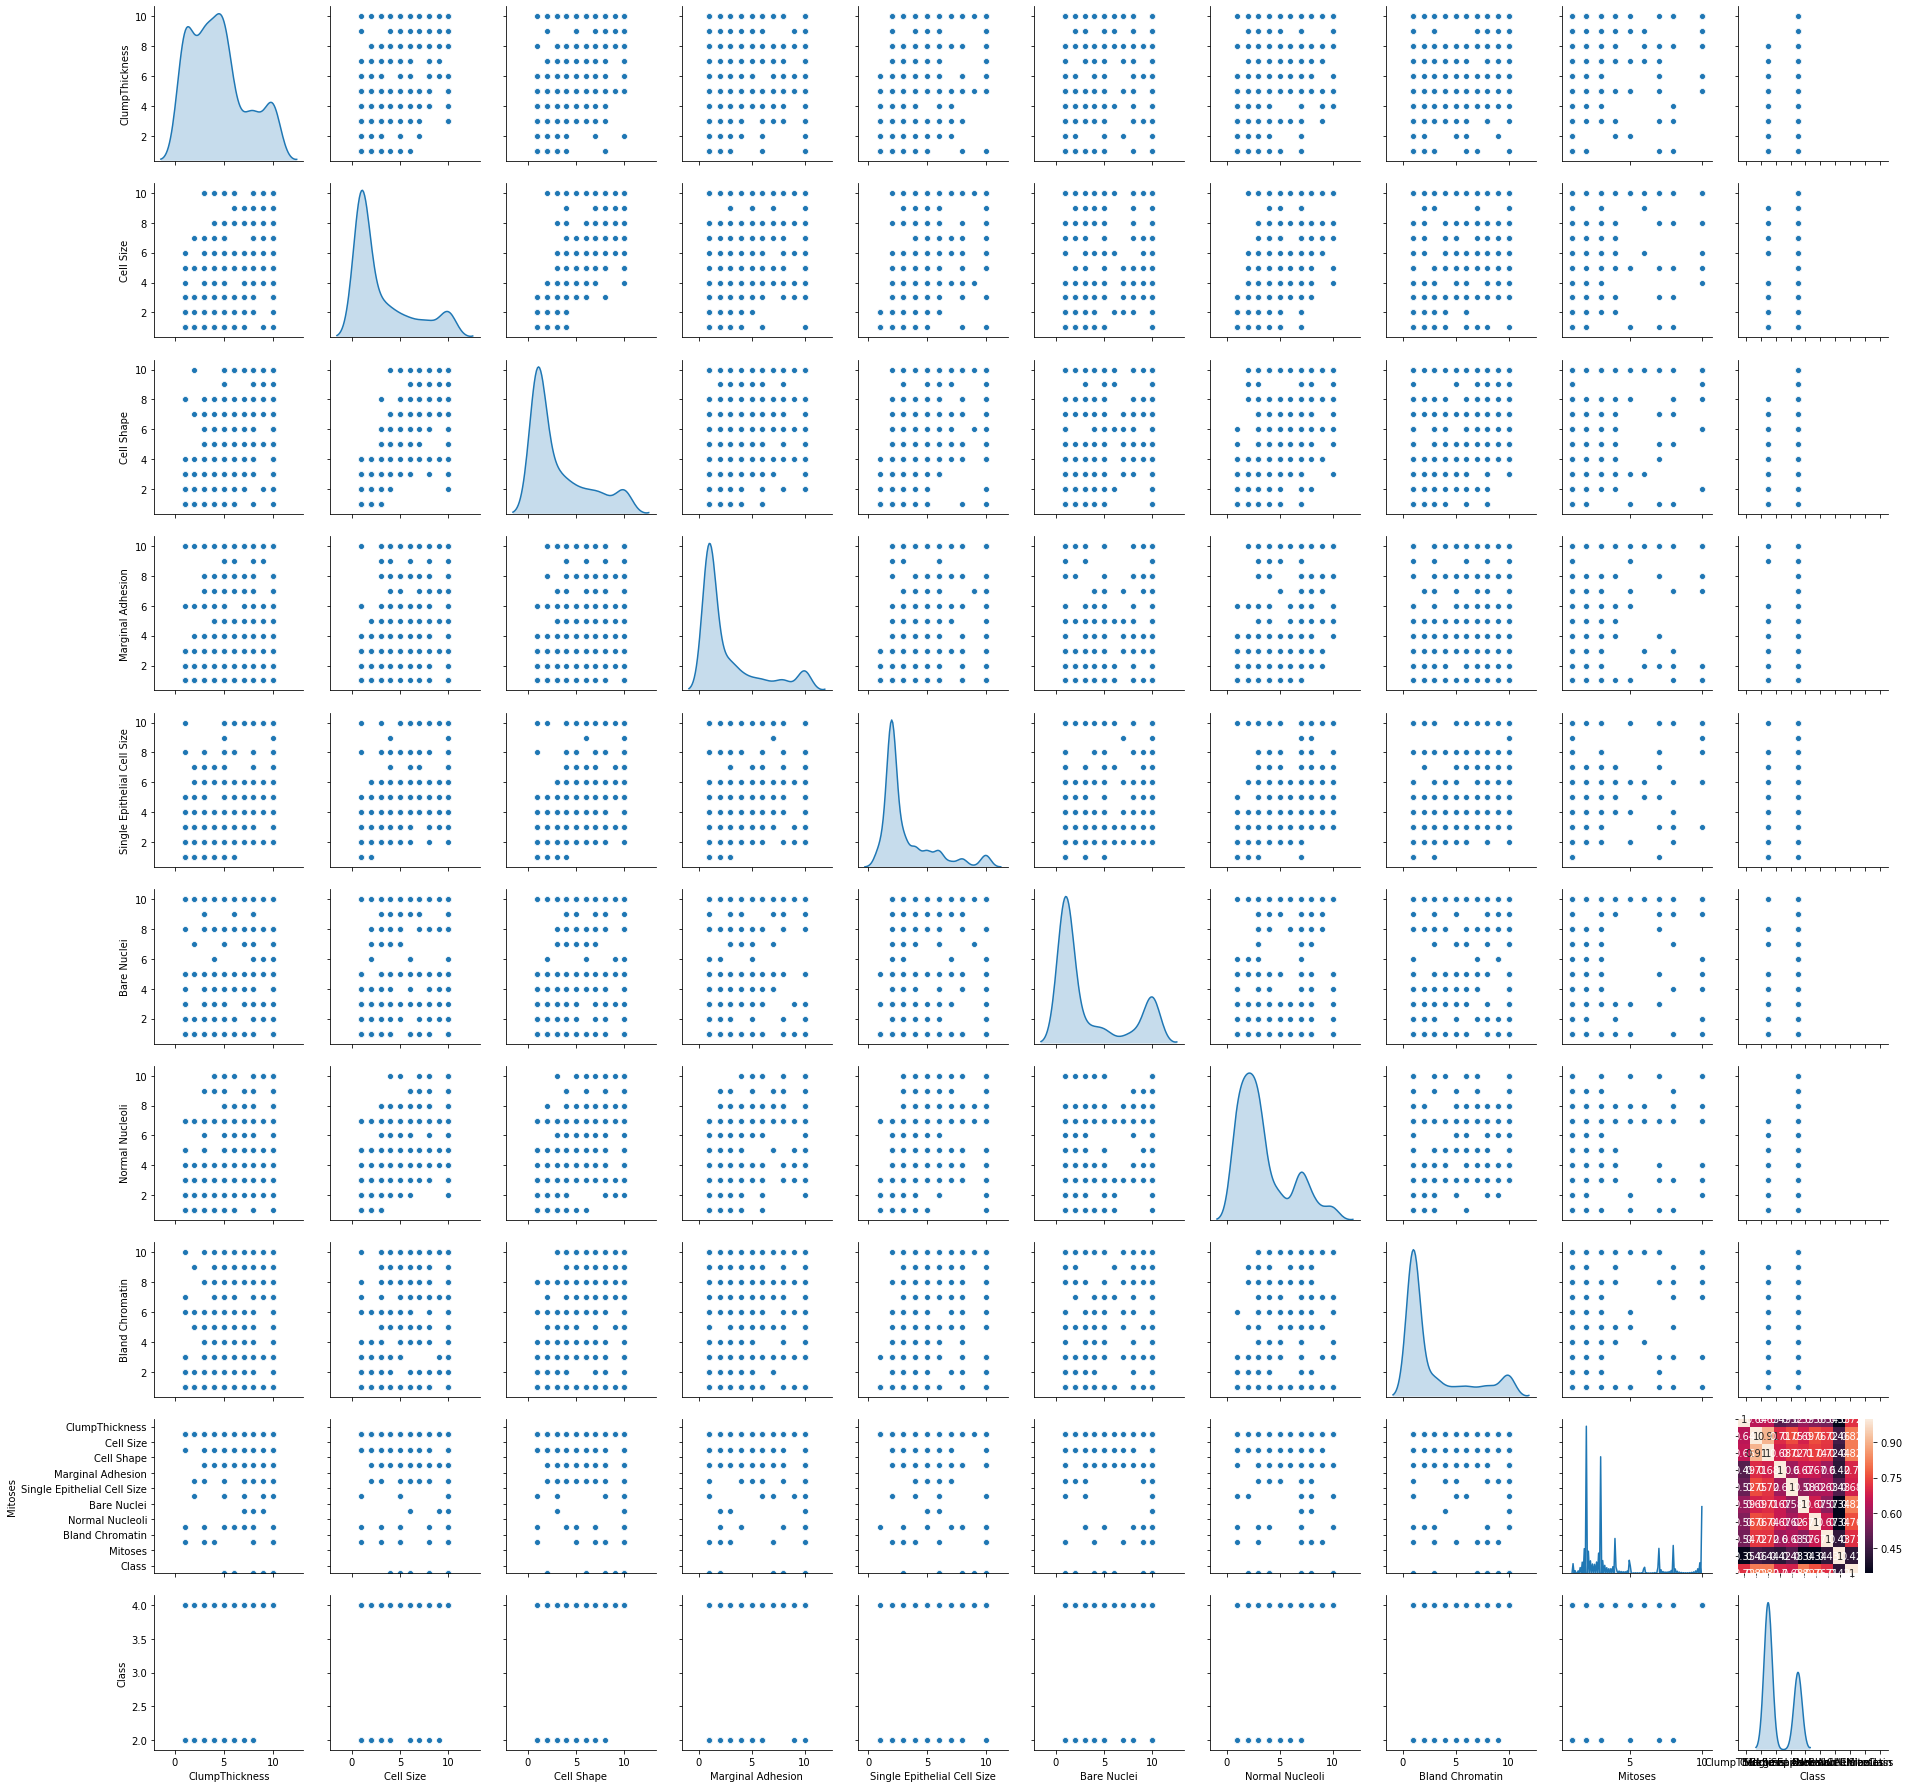

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(bc,diag_kind='kde')
corr = bc.corr()
sns.heatmap(corr, annot=True)
#As Cell Size & Cell Shape look to be more correlated, dropping the Cell shape
newbcb = bc.drop('Cell Shape',axis=1)
newbcb

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [524]:
from sklearn.model_selection import train_test_split
X= bc.drop('Class',axis=1)
y= bc.Class
print(X)
print(y)

     ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0                 5          1           1                  1   
1                 5          4           4                  5   
2                 3          1           1                  1   
3                 6          8           8                  1   
4                 4          1           1                  3   
..              ...        ...         ...                ...   
694               3          1           1                  1   
695               2          1           1                  1   
696               5         10          10                  3   
697               4          8           6                  4   
698               4          8           8                  5   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
0                              2            1                3   
1                              7           10                3   
2                    

#### Divide the Training and Test sets in 70:30 

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print("Training Independent variables",X_train)
print("Training Target variables",y_train)
print("Test Independent variables",X_test)
print("Test Target variables",y_test)

Training Independent variables      ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
405               1          1           1                  1   
425               9         10          10                 10   
244               1          1           1                  1   
471               6          1           1                  3   
224              10          5           5                  6   
..              ...        ...         ...                ...   
578               1          1           1                  1   
53                5          5           5                  8   
350               5          1           1                  3   
79                2          1           1                  1   
520               1          1           1                  1   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
405                            2            1                2   
425                           10           10           

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [528]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
X_train = scaler.transform(X_train)
print(scaler.fit(X_test))
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.20673599 -0.67308802 -0.7185444  ... -0.55889919 -0.59917787
  -0.32662887]
 [ 1.69298832  2.36512775  2.33388216 ...  2.8048141   2.39059742
  -0.32662887]
 [-1.20673599 -0.67308802 -0.7185444  ... -0.13843503 -0.59917787
  -0.32662887]
 ...
 [ 0.24312617 -0.67308802 -0.7185444  ... -0.97936335 -0.59917787
  -0.32662887]
 [-0.84427045 -0.67308802 -0.7185444  ... -0.55889919 -0.59917787
  -0.32662887]
 [-1.20673599 -0.67308802 -0.7185444  ... -0.97936335 -0.59917787
  -0.32662887]]
[[-0.89638062 -0.76477198 -0.80243922 ... -1.05533761 -0.64142394
  -0.38429328]
 [-0.21311409  0.16715519  0.1946746  ...  1.29815865 -0.00454911
  -0.38429328]
 [ 1.15341899  1.72036714  1.85653098 ...  1.29815865  1.26920056
  -0.38429328]
 ...
 [ 0.12851918 -0.76477198 -0.80243922 ... -0.66308823 -0.64142394
  -0.38429328]
 [ 0.12851918 -0.76477198 -0.47006795 ... -0.27083885 -0.64142394

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [529]:
neighbors = [3,5,9]
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'uniform', p=2)
    KNN.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k= %d  is %f "%( k,accuracy_score_test))

test accuracy for k= 3  is 0.942857 
test accuracy for k= 5  is 0.942857 
test accuracy for k= 9  is 0.942857 


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [530]:
neighbors = list(range(1, 20, 2))
cv_list=[]
cv_df = pd.DataFrame()
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'uniform', p=2)
    KNN.fit(X_train, y_train)
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k="+ str(k)+" is ",accuracy_score_test)
    cv_list.append(accuracy_score_test)

data = pd.DataFrame({"K": neighbors,"Accuracy": cv_list})
print('****************************')  
print('List of Optimal Neighbours')   
print('****************************')  
print(data[data["Accuracy"] == data["Accuracy"].max()])

test accuracy for k=1 is  0.9380952380952381
test accuracy for k=3 is  0.9428571428571428
test accuracy for k=5 is  0.9428571428571428
test accuracy for k=7 is  0.9476190476190476
test accuracy for k=9 is  0.9428571428571428
test accuracy for k=11 is  0.9380952380952381
test accuracy for k=13 is  0.9380952380952381
test accuracy for k=15 is  0.9380952380952381
test accuracy for k=17 is  0.9380952380952381
test accuracy for k=19 is  0.9380952380952381
****************************
List of Optimal Neighbours
****************************
   K  Accuracy
3  7  0.947619


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

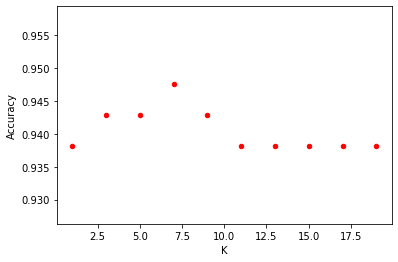

In [531]:
data.plot(kind='scatter',x='K',y='Accuracy',color='red')
plt.show()